In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np


In [2]:
pip install cryptocmd

Note: you may need to restart the kernel to use updated packages.


In [3]:
from cryptocmd import CmcScraper

# initialise scraper without time interval
scraper = CmcScraper("BTC")

# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
btc_json_data = scraper.get_data("json")

# export the data as csv file, you can also pass optional `name` parameter
scraper.export("csv", name="BTC_all_time")

# Pandas dataFrame for the same data
df = scraper.get_dataframe()



# initialise scraper without time interval
scraper2 = CmcScraper("ETH")

# get raw data as list of list
headers, data = scraper2.get_data()

# get data in a json format
eth_json_data = scraper2.get_data("json")

# export the data as csv file, you can also pass optional `name` parameter
scraper2.export("csv", name="ETH_all_time")

# Pandas dataFrame for the same data
df2 = scraper2.get_dataframe()



In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-08-10,46280.847674,46637.987835,44705.556576,45585.030772,3.354602e+10,8.561951e+11
1,2021-08-09,43791.927424,46456.832918,42848.687948,46365.400650,3.873408e+10,8.708054e+11
2,2021-08-08,44574.438586,45282.353284,43331.909821,43798.117678,3.630266e+10,8.225451e+11
3,2021-08-07,42832.796642,44689.860959,42618.566142,44555.800664,4.003086e+10,8.367306e+11
4,2021-08-06,40865.866924,43271.658613,39932.179420,42816.498968,3.822648e+10,8.040229e+11


In [5]:
df2.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-08-10,3163.050031,3228.940694,3059.228988,3141.691170,2.760522e+10,3.677457e+11
1,2021-08-09,3012.885711,3185.701187,2900.925917,3167.856223,3.198326e+10,3.707654e+11
2,2021-08-08,3161.232779,3184.603971,2951.747227,3013.732756,2.843364e+10,3.526859e+11
3,2021-08-07,2891.707469,3170.229727,2868.535554,3157.238771,3.308147e+10,3.694372e+11
4,2021-08-06,2827.503486,2944.903352,2727.792661,2890.941728,2.652858e+10,3.382378e+11


In [6]:
df.columns =[df.columns[0]]+['bt_'+i for i in df.columns[1:]]
df2.columns =[df2.columns[0]]+['eth_'+i for i in df2.columns[1:]]

In [1]:
df.plot(x="Date", y=["bt_Close", "bt_Open", "bt_High" ])
df.plot(x="Date", y=["bt_Volume"])


NameError: name 'df' is not defined

In [8]:
df2.plot(x="Date", y=["eth_Close", "eth_Open", "eth_High" ])
df2.plot(x="Date", y=["eth_Volume"])

<AxesSubplot:xlabel='Date'>

In [9]:
market_info = pd.merge(df,df2, on=['Date'])
market_info = market_info[market_info['Date']>='2017-01-01']
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
0,2021-08-10,46280.847674,46637.987835,44705.556576,45585.030772,3.354602e+10,8.561951e+11,3163.050031,3228.940694,3059.228988,3141.691170,2.760522e+10,3.677457e+11,-0.015035,-0.006753
1,2021-08-09,43791.927424,46456.832918,42848.687948,46365.400650,3.873408e+10,8.708054e+11,3012.885711,3185.701187,2900.925917,3167.856223,3.198326e+10,3.707654e+11,0.058766,0.051436
2,2021-08-08,44574.438586,45282.353284,43331.909821,43798.117678,3.630266e+10,8.225451e+11,3161.232779,3184.603971,2951.747227,3013.732756,2.843364e+10,3.526859e+11,-0.017416,-0.046659
3,2021-08-07,42832.796642,44689.860959,42618.566142,44555.800664,4.003086e+10,8.367306e+11,2891.707469,3170.229727,2868.535554,3157.238771,3.308147e+10,3.694372e+11,0.040226,0.091825
4,2021-08-06,40865.866924,43271.658613,39932.179420,42816.498968,3.822648e+10,8.040229e+11,2827.503486,2944.903352,2727.792661,2890.941728,2.652858e+10,3.382378e+11,0.047733,0.022436


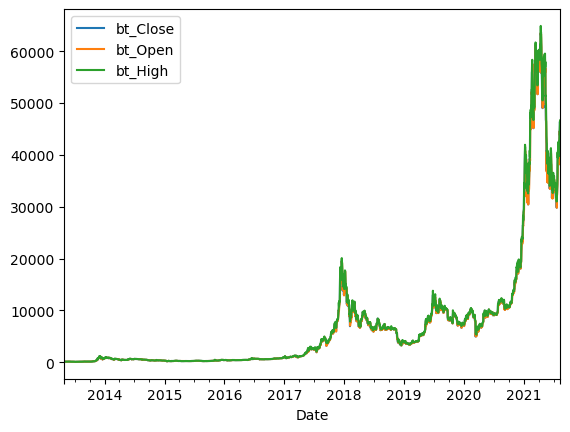

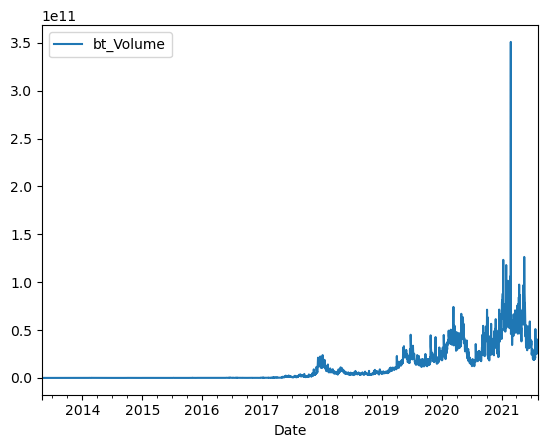

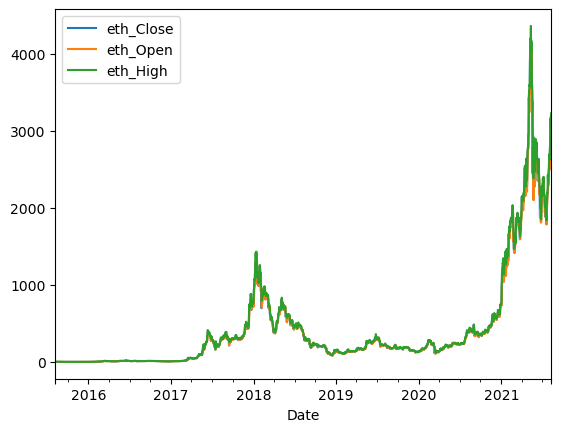

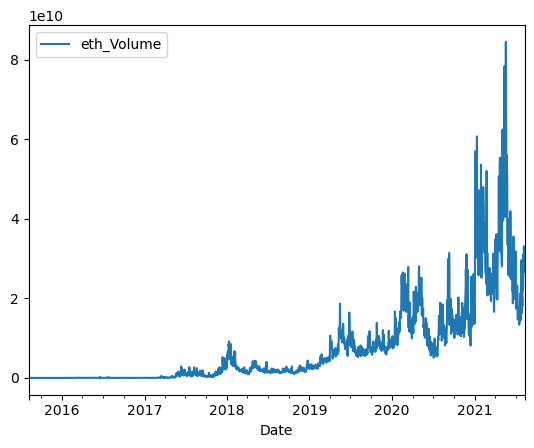

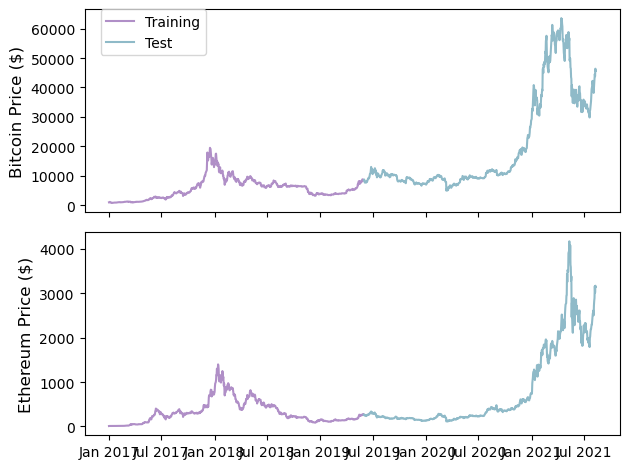

In [10]:
split_date = '2019-06-01'
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2022) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2022) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2022) for j in [1,7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'],
         market_info[market_info['Date'] < split_date]['bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'],
         market_info[market_info['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_info[market_info['Date'] < split_date]['Date'],
         market_info[market_info['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'],
         market_info[market_info['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 10})

plt.show()

Lag model of P_t = P_(t-1)

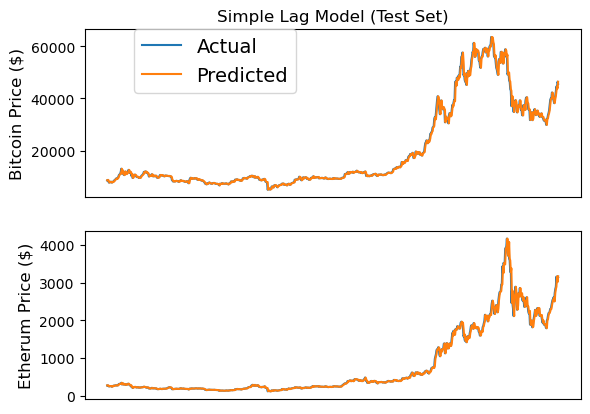

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
from matplotlib.pyplot import figure

plt.show()

 \begin{align} PredPrice_{t} & = ActualPrice_{t-1} * \epsilon, \epsilon \sim N(\mu, \sigma) \end{align}

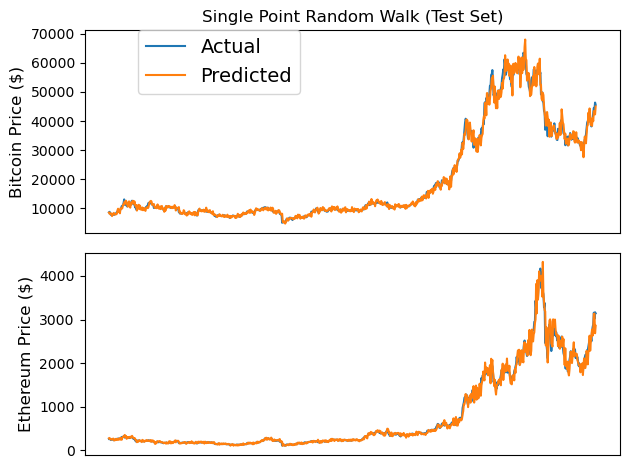

In [12]:
np.random.seed(202)
bt_r_walk_mean, bt_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['bt_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean, eth_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
     market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
     market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

\begin{align} PredPrice_{t} & = PredPrice_{t-1} * \epsilon, \epsilon \sim N(\mu, \sigma)\ \& \ PredPrice_0 = Price_0 \end{align}

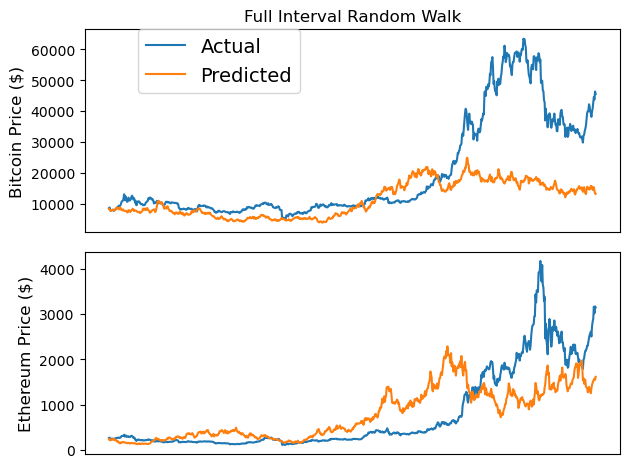

In [13]:
bt_random_walk = []
eth_random_walk = []
for n_step, (bt_step, eth_step) in enumerate(zip(bt_random_steps, eth_random_steps)):
    if n_step==0:
        bt_random_walk.append(market_info[market_info['Date']< split_date]['bt_Close'].values[0] * (bt_step+1))
        eth_random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (eth_step+1))
    else:
        bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
        eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
         bt_random_walk[::-1], label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
         eth_random_walk[::-1], label='Predicted')

ax1.set_title('Full Interval Random Walk')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

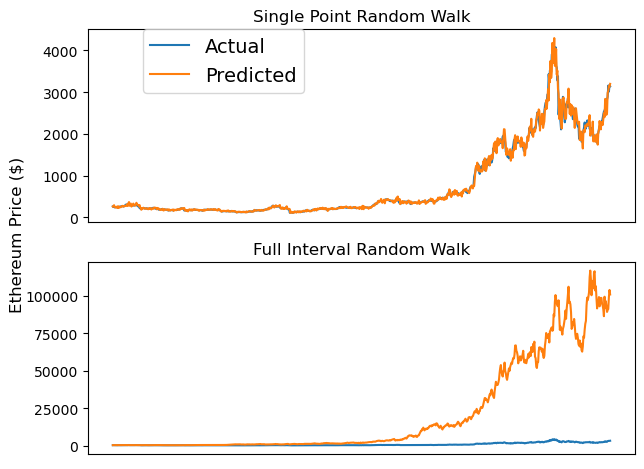

<function __main__.plot_func(freq)>

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(freq):
    np.random.seed(freq)
    random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
    random_walk = []
    for n_step,i in enumerate(random_steps):
        if n_step==0:
            random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (i+1))
        else:
            random_walk.append(random_walk[n_step-1] * (i+1))
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax1.set_xticklabels('')
    ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps), label='Predicted')
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps))
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
             random_walk[::-1])
    ax1.set_title('Single Point Random Walk')
    ax1.set_ylabel('')
    # for static figures, you may wish to insert the random seed value
#    ax1.annotate('Random Seed: %d'%freq, xy=(0.75, 0.2),  xycoords='axes fraction',
#            xytext=(0.75, 0.2), textcoords='axes fraction')
    ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
    ax2.set_title('Full Interval Random Walk')
    fig.text(0.0, 0.5, 'Ethereum Price ($)', va='center', rotation='vertical',fontsize=12)
    plt.tight_layout()
#    plt.savefig('image%d.png'%freq, bbox_inches='tight')
    plt.show()
    
interact(plot_func, freq =widgets.IntSlider(min=200,max=210,step=1,value=205, description='Random Seed:'))

Seed value changeable 

# LSTM


Normalisation

In [15]:
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_info = market_info.assign(**kwargs)

In [16]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1682,2017-01-01,998.325012,1.477750e+08,-0.785719,0.046055,8.172570,1.473170e+07,0.221711,0.061250
1681,2017-01-02,1021.750000,2.221850e+08,-0.444187,0.034736,8.378510,1.457960e+07,-0.697217,0.046742
1680,2017-01-03,1043.839966,1.851680e+08,-0.978649,0.022005,9.725250,3.362520e+07,-0.676655,0.200563
1679,2017-01-04,1154.729980,3.449460e+08,-0.918448,0.110130,11.251600,4.105120e+07,-0.971106,0.176799
1678,2017-01-05,1013.380005,5.101990e+08,0.266339,0.242652,10.254400,4.155740e+07,0.315398,0.220454
...,...,...,...,...,...,...,...,...,...
4,2021-08-06,42816.498968,3.822648e+10,-0.727407,0.081718,2890.941728,2.652858e+10,-0.502911,0.076785
3,2021-08-07,44555.800664,4.003086e+10,-0.870554,0.048358,3157.238771,3.308147e+10,-0.913880,0.104331
2,2021-08-08,43798.117678,3.630266e+10,0.521947,0.043757,3013.732756,2.843364e+10,0.467608,0.073660
1,2021-08-09,46365.400650,3.873408e+10,-0.949319,0.082393,3167.856223,3.198326e+10,-0.874673,0.094519


In [17]:
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

/Users/marcus/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/Users/marcus/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
window_len = 10
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close','Volume']]

In [19]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1

In [20]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1


In [21]:
LSTM_training_inputs[0]

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1682,0.000000,0.000000,-0.785719,0.046055,0.000000,0.000000,0.221711,0.061250
1681,0.023464,0.503536,-0.444187,0.034736,0.025199,-0.010325,-0.697217,0.046742
1680,0.045591,0.253040,-0.978649,0.022005,0.189987,1.282506,-0.676655,0.200563
1679,0.156667,1.334265,-0.918448,0.110130,0.376752,1.786589,-0.971106,0.176799
1678,0.015080,2.452539,0.266339,0.242652,0.254734,1.820951,0.315398,0.220454
1677,-0.096285,1.381160,0.775803,0.160579,0.254770,1.000570,-0.252427,0.097407
1676,-0.089891,0.891727,-1.000000,0.094112,0.207355,0.571686,0.189863,0.067821
1675,-0.087272,0.074031,0.136549,0.061084,0.259065,0.132021,-0.628908,0.057320
1674,-0.095657,-0.039912,-0.359014,0.037097,0.263446,0.745780,0.415946,0.062751
1673,-0.090798,-0.216322,0.041624,0.015306,0.290855,-0.261477,-0.298998,0.038575


In [22]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [23]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


In [24]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# model output is next price normalised to 10th previous closing price
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 13s - loss: 0.1150
Epoch 2/50
 - 12s - loss: 0.0754
Epoch 3/50
 - 9s - loss: 0.0681
Epoch 4/50
 - 9s - loss: 0.0650
Epoch 5/50
 - 9s - loss: 0.0622
Epoch 6/50
 - 9s - loss: 0.0583
Epoch 7/50
 - 9s - loss: 0.0586
Epoch 8/50
 - 9s - loss: 0.0577
Epoch 9/50
 - 10s - loss: 0.0603
Epoch 10/50
 - 9s - loss: 0.0564
Epoch 11/50
 - 9s - loss: 0.0560
Epoch 12/50
 - 12s - loss: 0.0547
Epoch 13/50
 - 11s - loss: 0.0553
Epoch 14/50
 - 10s - loss: 0.0533
Epoch 15/50
 - 10s - loss: 0.0546
Epoch 16/50
 - 9s - loss: 0.0548
Epoch 17/50
 - 10s - loss: 0.0546
Epoch 18/50
 - 9s - loss: 0.0545
Epoch 19/50
 - 9s - loss: 0.0539
Epoch 20/50
 - 9s - loss: 0.0530
Epoch 21/50
 - 10s - loss: 0.0545
Epoch 22/50
 - 9s - loss: 0.0533
Epoch 23/50
 - 9s - loss: 0.0510
Epoch 24/50
 - 10s - loss: 0.0536
Epoch 25/50
 - 9s - loss: 0.0520
Epoch 26/50
 - 9s - loss: 0.0541
Epoch 27/50
 - 9s - loss: 0.0518
Epoch 28/50
 - 9s - loss: 0.0529
Epoch 29/50
 - 9s - loss: 0.0523
Epoch 30/50
 - 9s - loss: 0.0531
Epoch 31/

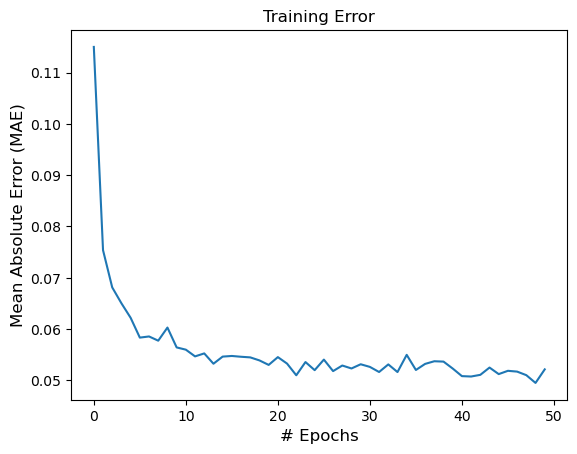

In [25]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('Training Error')

if eth_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

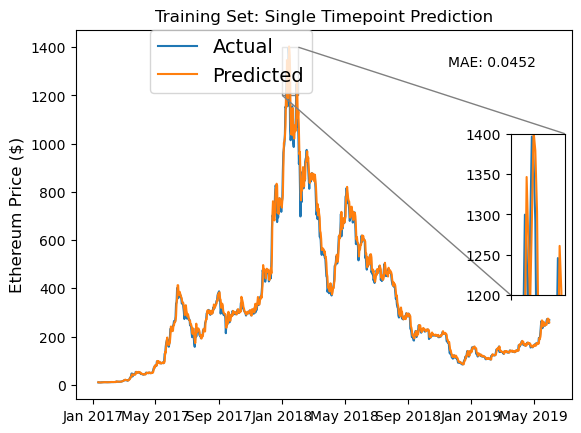

<Figure size 1600x1200 with 0 Axes>

In [26]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.pyplot import figure

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2017,2021) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2017,2021) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close'].values[window_len:])/(training_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 3.35, loc=5) # zoom-factor: 3.35, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2017,2021) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['eth_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2018, 1, 1), datetime.date(2018, 2, 1)])
axins.set_ylim([1200,1400])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
figure(figsize=(16, 12), dpi=100)
plt.show()

# <center> Prediction for the next 5 days <center/>

\begin{align} PredPrice_{t} & = \phi_0 + \phi_1*Price_{t-1} + \ldots + \phi_p*Price_{t-p} + \epsilon_t, \ \epsilon_t \sim N(0, \sigma)\ \end{align}

In [28]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['eth_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['eth_Close'][i:i+pred_range].values/
                                  training_set['eth_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 12s - loss: 0.1424
Epoch 2/50
 - 9s - loss: 0.1094
Epoch 3/50
 - 10s - loss: 0.1010
Epoch 4/50
 - 9s - loss: 0.0963
Epoch 5/50
 - 9s - loss: 0.0971
Epoch 6/50
 - 10s - loss: 0.0959
Epoch 7/50
 - 9s - loss: 0.0929
Epoch 8/50
 - 9s - loss: 0.0913
Epoch 9/50
 - 9s - loss: 0.0921
Epoch 10/50
 - 9s - loss: 0.0901
Epoch 11/50
 - 9s - loss: 0.0889
Epoch 12/50
 - 9s - loss: 0.0904
Epoch 13/50
 - 9s - loss: 0.0915
Epoch 14/50
 - 9s - loss: 0.0877
Epoch 15/50
 - 9s - loss: 0.0898
Epoch 16/50
 - 10s - loss: 0.0878
Epoch 17/50
 - 9s - loss: 0.0871
Epoch 18/50
 - 10s - loss: 0.0864
Epoch 19/50
 - 10s - loss: 0.0873
Epoch 20/50
 - 10s - loss: 0.0874
Epoch 21/50
 - 9s - loss: 0.0888
Epoch 22/50
 - 9s - loss: 0.0857
Epoch 23/50
 - 9s - loss: 0.0887
Epoch 24/50
 - 9s - loss: 0.0872
Epoch 25/50
 - 9s - loss: 0.0878
Epoch 26/50
 - 9s - loss: 0.0884
Epoch 27/50
 - 9s - loss: 0.0858
Epoch 28/50
 - 9s - loss: 0.0870
Epoch 29/50
 - 9s - loss: 0.0862
Epoch 30/50
 - 9s - loss: 0.0863
Epoch 31/50


In [29]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['bt_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['bt_Close'][i:i+pred_range].values/
                                  training_set['bt_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 12s - loss: 0.1001
Epoch 2/50
 - 10s - loss: 0.0783
Epoch 3/50
 - 9s - loss: 0.0712
Epoch 4/50
 - 9s - loss: 0.0679
Epoch 5/50
 - 9s - loss: 0.0670
Epoch 6/50
 - 10s - loss: 0.0636
Epoch 7/50
 - 9s - loss: 0.0645
Epoch 8/50
 - 9s - loss: 0.0635
Epoch 9/50
 - 9s - loss: 0.0630
Epoch 10/50
 - 9s - loss: 0.0619
Epoch 11/50
 - 9s - loss: 0.0610
Epoch 12/50
 - 9s - loss: 0.0616
Epoch 13/50
 - 10s - loss: 0.0612
Epoch 14/50
 - 10s - loss: 0.0599
Epoch 15/50
 - 10s - loss: 0.0609
Epoch 16/50
 - 9s - loss: 0.0589
Epoch 17/50
 - 9s - loss: 0.0596
Epoch 18/50
 - 9s - loss: 0.0599
Epoch 19/50
 - 9s - loss: 0.0585
Epoch 20/50
 - 9s - loss: 0.0592
Epoch 21/50
 - 9s - loss: 0.0599
Epoch 22/50
 - 9s - loss: 0.0586
Epoch 23/50
 - 9s - loss: 0.0580
Epoch 24/50
 - 9s - loss: 0.0607
Epoch 25/50
 - 9s - loss: 0.0581
Epoch 26/50
 - 9s - loss: 0.0586
Epoch 27/50
 - 9s - loss: 0.0587
Epoch 28/50
 - 9s - loss: 0.0574
Epoch 29/50
 - 10s - loss: 0.0576
Epoch 30/50
 - 9s - loss: 0.0575
Epoch 31/50


In [31]:
import matplotlib.pyplot as plt


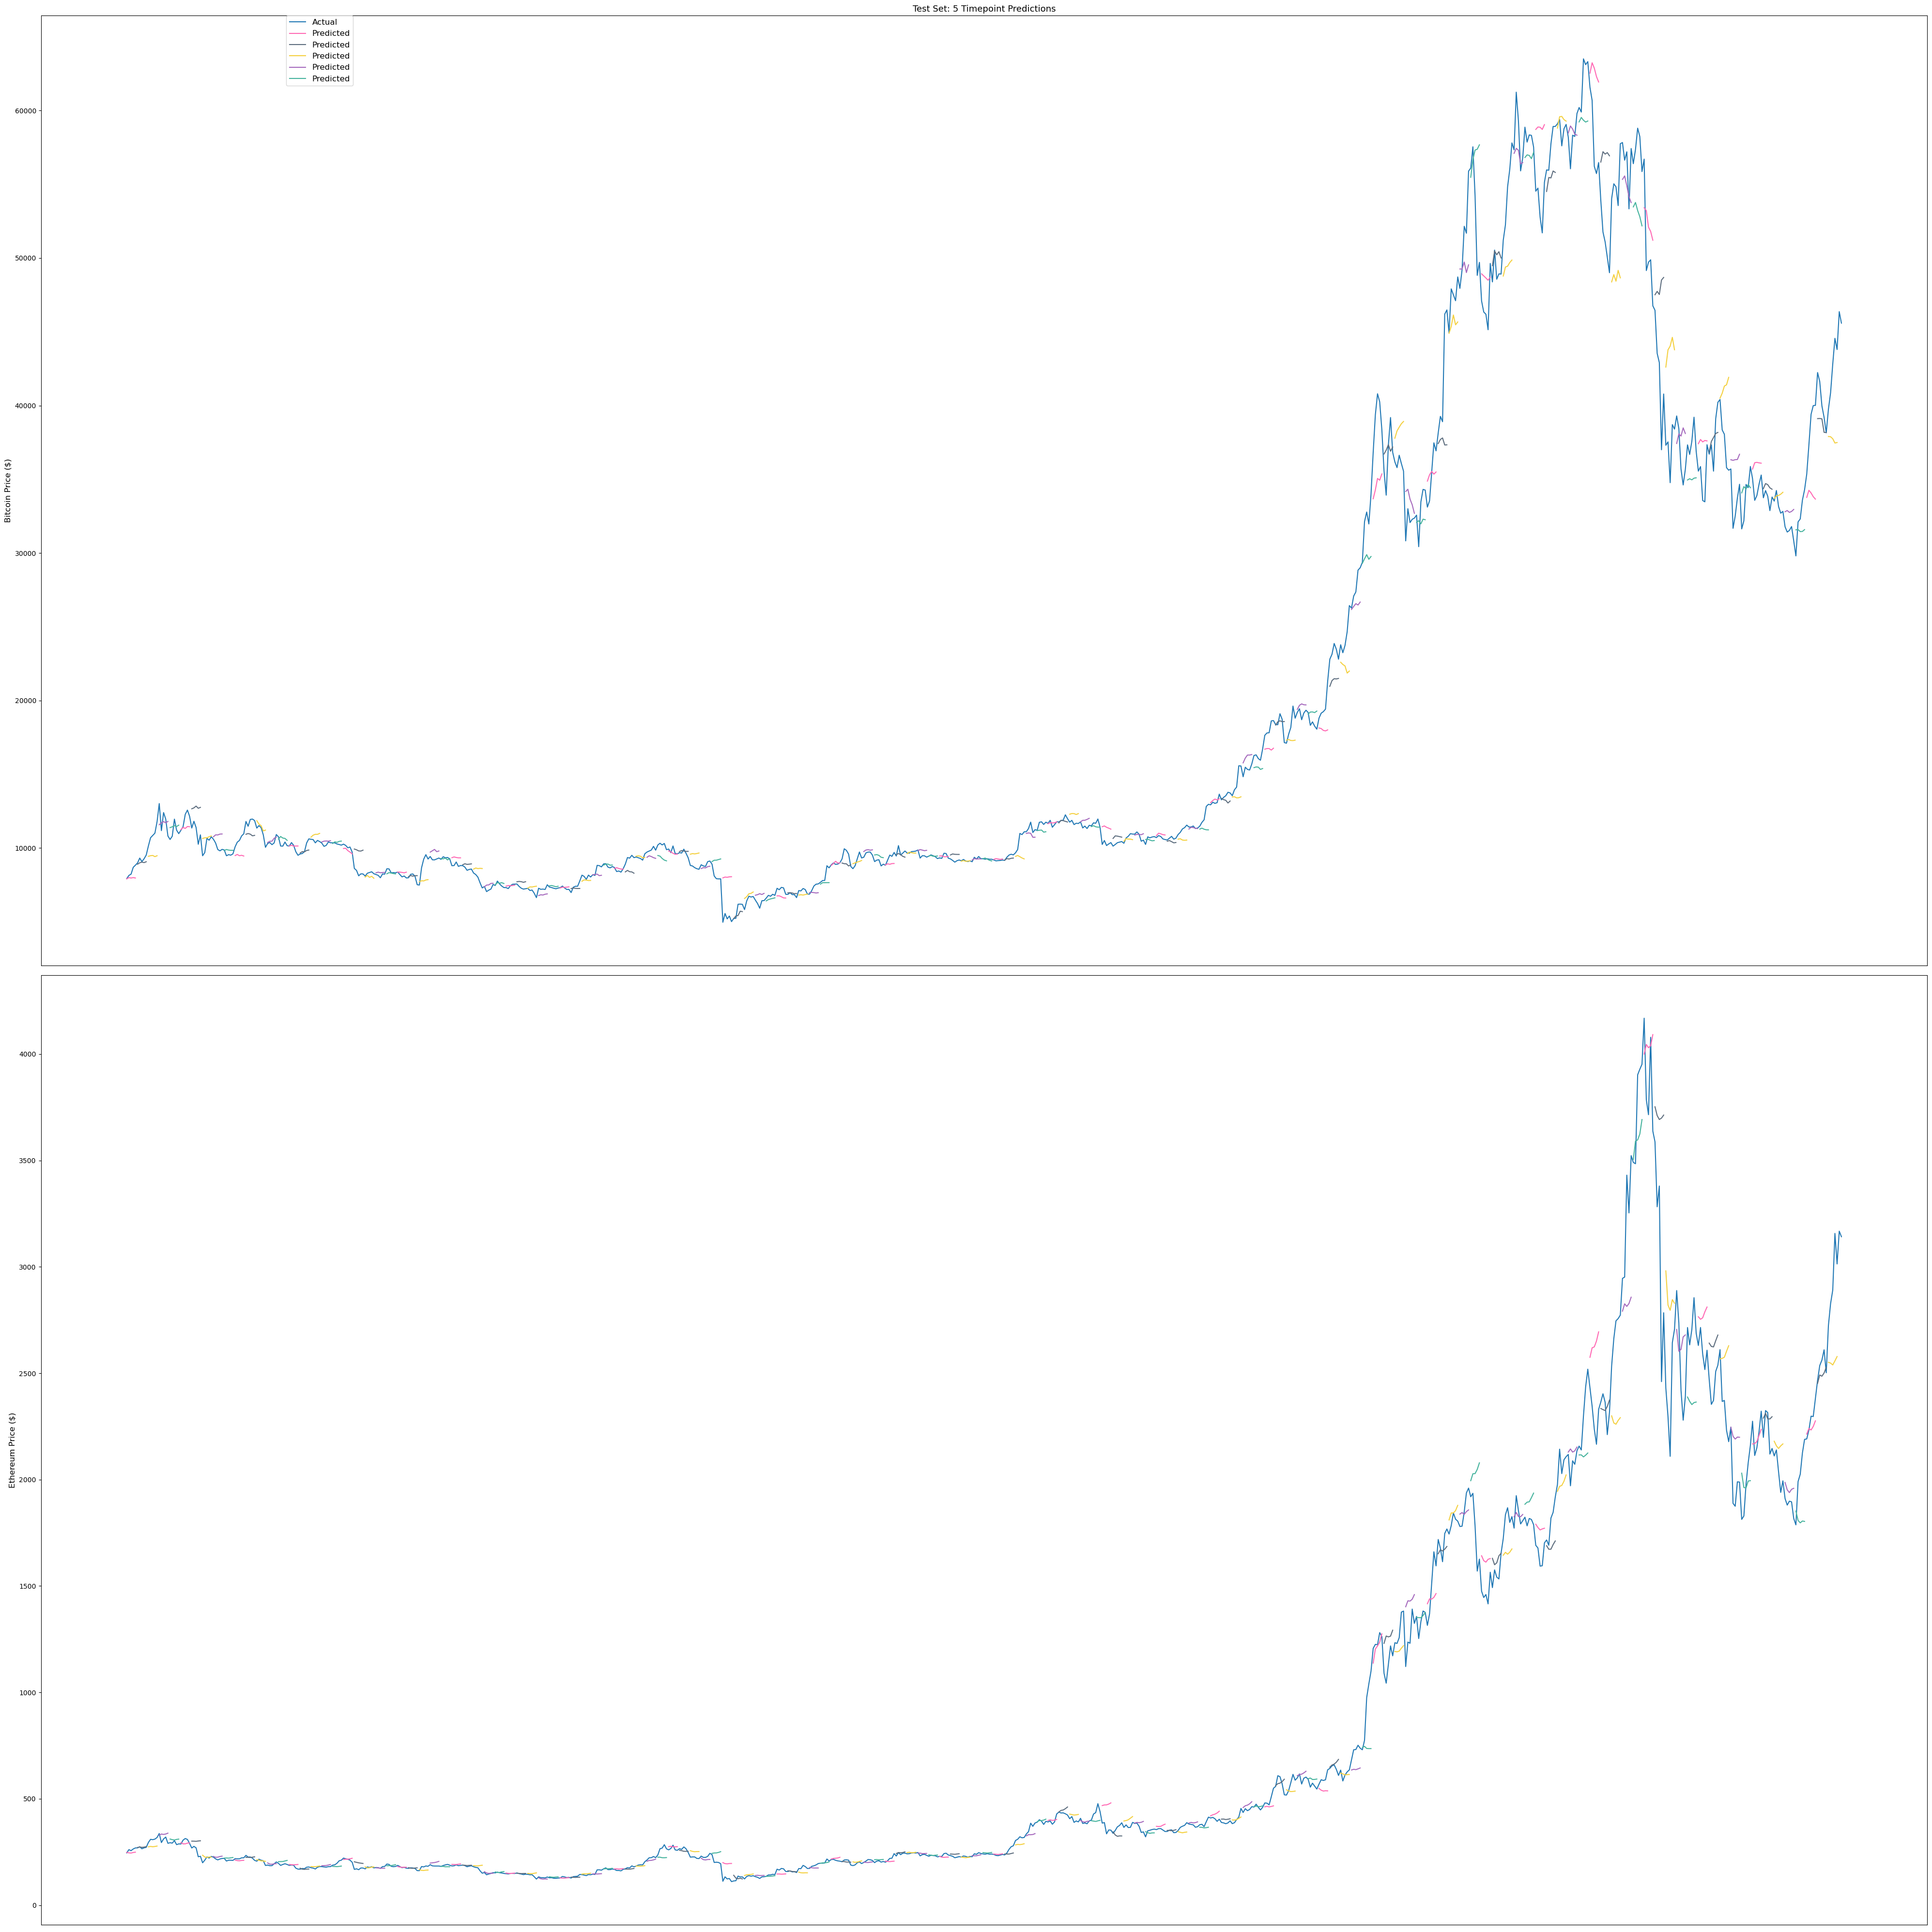

In [32]:
# little bit of reformatting the predictions to closing prices
eth_pred_prices = ((eth_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['eth_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))
bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['bt_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2021,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         test_set['bt_Close'][window_len:], label='Actual')
ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         test_set['eth_Close'][window_len:], label='Actual')
for i, (eth_pred, bt_pred) in enumerate(zip(eth_pred_prices, bt_pred_prices)):
    # Only adding lines to the legend once
    if i<5:
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:][i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:][i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
    ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:][i*pred_range:i*pred_range+pred_range],
             eth_pred, color=pred_colors[i%5])
ax1.set_title('Test Set: 5 Timepoint Predictions',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.set_xticklabels('')
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.13, 1), loc=2, borderaxespad=0., prop={'size': 12})

plt.rcParams["figure.figsize"]=40,40

fig.tight_layout()
plt.show()

# <center> Model reproducibility and MAE 
    

In [ ]:
for rand_seed in range(775,800):
    print(rand_seed)
    np.random.seed(rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 5)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('eth_model_randseed_%d.h5'%rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 5)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('bt_model_randseed_%d.h5'%rand_seed)